# training pytorch data-augmentation

## 事前準備

In [ ]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.9.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.7.2
arviz                                 0.22.0
astropy                               7.1.0
astropy

In [ ]:
import torch

torch.__version__

'2.6.0+cu124'

## データ用意(CIFAR-10)

In [ ]:
# @title データ取得
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

cifar10_data = CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
cifar10_classes = cifar10_data.classes

In [ ]:
len(cifar10_data), cifar10_classes

(50000,
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

In [ ]:
type(cifar10_data)

torchvision.datasets.cifar.CIFAR10

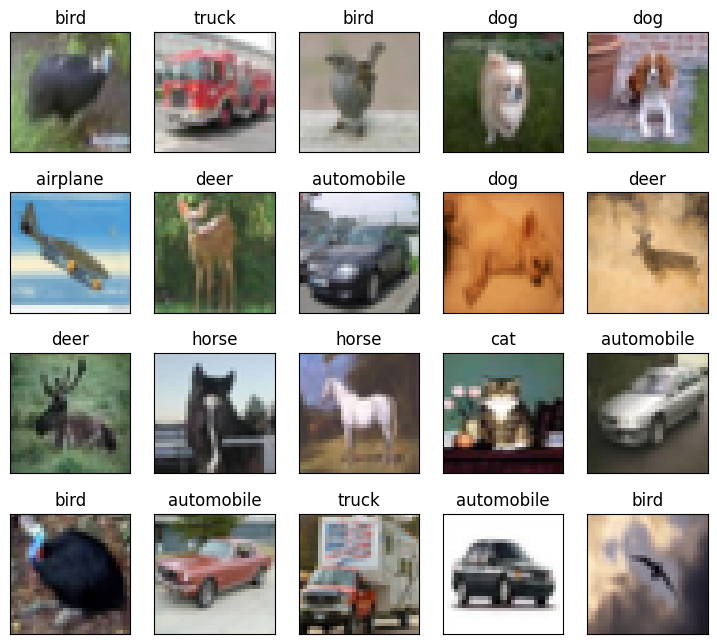

In [ ]:
# @title 試しに画像を表示(20枚)
from torchvision.datasets import VisionDataset

def show_image(image_data: VisionDataset, n_images: int = 20, figsize: tuple = (9, 8)) -> None:
    cifar10_loader = DataLoader(cifar10_data, batch_size=n_images, shuffle=True)
    data_iter = iter(cifar10_loader)
    images, labels = next(data_iter)   # 最初のバッチ取得

    ncols = 5
    nrows = n_images // ncols

    plt.figure(figsize=figsize)
    for i in range(n_images):
        ax = plt.subplot(nrows, ncols, i+1)
        ax.imshow(images[i].permute(1, 2, 0))   # permuteでチャネル情報の次元を変更
        label = cifar10_classes[labels[i]]
        ax.set_title(label)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


show_image(cifar10_data, n_images=20)

## データ拡張

In [ ]:
# @title 回転とリサイズ
transform = transforms.Compose([
    transforms.RandomAffine((-45, 45), scale=(0.5, 1.5)),
    transforms.ToTensor()
])

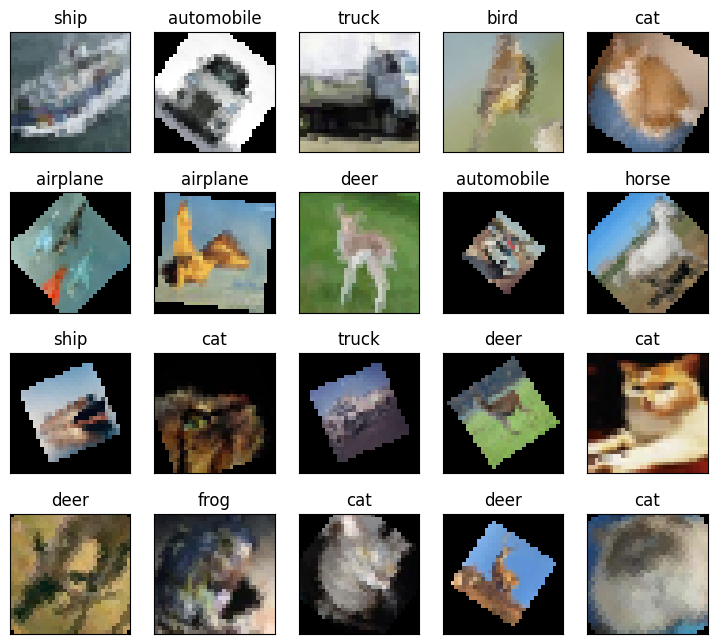

In [ ]:
cifar10_data = CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform)

show_image(cifar10_data, n_images=20)

In [ ]:
# @title シフト
transform = transforms.Compose([
    transforms.RandomAffine((0, 0), translate=(0.5, 0.5)),  # 上下左右シフト
    transforms.ToTensor()
])

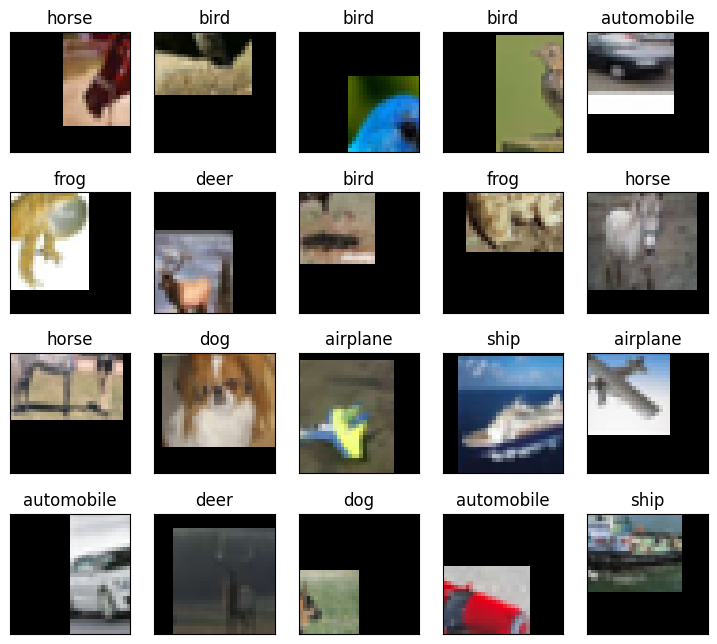

In [ ]:
cifar10_data = CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform)

show_image(cifar10_data, n_images=20)

In [ ]:
# @title 反転
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), # 水平反転(pは確率)
    transforms.RandomVerticalFlip(p=0.5),   # 垂直反転(pは確率)
    transforms.ToTensor()
])

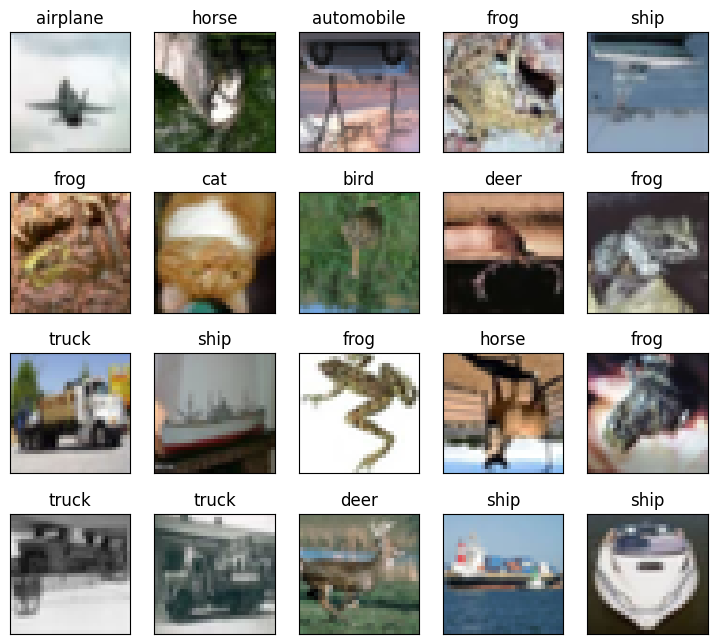

In [ ]:
cifar10_data = CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform)

show_image(cifar10_data, n_images=20)

In [ ]:
# @title マスキング
# RandomErasingはTensorにしか適応できないため、ToTensorの後に入れる必要がある
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.5),    # pは確率
])

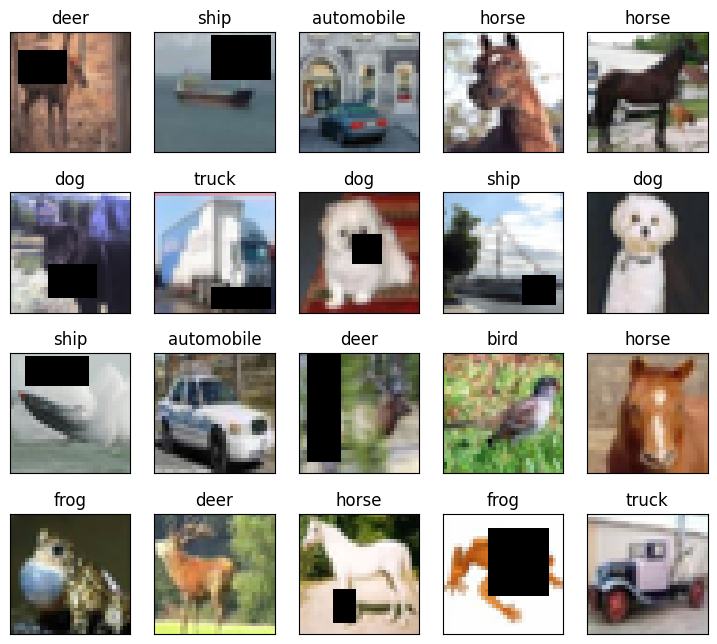

In [ ]:
cifar10_data = CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform)

show_image(cifar10_data, n_images=20)